In [1]:
#!pip install dtreeviz

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import dtreeviz
import graphviz
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.font_manager
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()
plt.rcParams['font.family'] = 'Times New Roman'

## Loading data

In [4]:
df= pd.read_csv('../data/cleaned/withyr_builtencoded.csv')
df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,price,year_bin
0,1180,5650,1340,0,0,3,7,3,1,1.0,1,1,221900,4
1,2170,7639,1690,0,0,3,7,3,2,2.0,1,1,538000,4
2,770,8062,2720,0,0,3,6,2,1,1.0,1,0,180000,2
3,1050,5000,1360,0,0,5,7,4,3,1.0,1,1,604000,5
4,1680,7503,1800,0,0,3,8,3,1,1.0,1,0,510000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1509,1530,0,0,3,8,3,1,3.0,2,1,360000,9
21593,2310,7200,1830,0,0,3,8,4,1,2.0,3,1,400000,10
21594,1020,2007,1020,0,0,3,7,2,1,2.0,2,1,402101,9
21595,1600,1287,1410,0,0,3,8,3,1,2.0,2,0,400000,9


In [5]:
#divide x and y
X = df.drop(columns=["price"])
y = df["price"]


In [6]:
X.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'floors',
       'yr_built_cat', 'zip', 'year_bin'],
      dtype='object')

we will power transform our X dataset

In [7]:

from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
pt.fit(X)

PowerTransformer()

In [8]:
X_transformed= pt.transform(X)
X= pd.DataFrame(X_transformed, columns=X.columns)

In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.0,1.594995e-15,1.000023,-4.142351,-0.715949,-0.049797,0.745827,3.423821
sqft_lot15,21597.0,-1.012796e-14,1.000023,-4.057090,-0.483459,0.054668,0.404640,3.952107
sqft_living15,21597.0,3.551891e-15,1.000023,-5.678217,-0.695935,-0.029640,0.715653,3.236867
waterfront,21597.0,-2.434605e-17,1.000023,-0.087205,-0.087205,-0.087205,-0.087205,11.467211
view,21597.0,-2.105604e-17,1.000023,-0.330091,-0.330091,-0.330091,-0.330091,3.030949
condition,21597.0,-4.048024e-15,1.000023,-8.121469,-0.598849,-0.598849,0.992639,2.078659
grade,21597.0,-4.927114e-15,1.000023,-7.209272,-0.508393,-0.508393,0.394387,3.298542
bedrooms,21597.0,-3.355807e-16,1.000023,-3.272153,-0.350967,-0.350967,0.729637,13.806819
sqft_basement_cat,21597.0,9.422579e-16,1.000023,-0.792763,-0.792763,-0.792763,1.319139,1.531430
floors,21597.0,-6.948494e-16,1.000023,-0.975556,-0.975556,0.273771,1.029872,2.133453


standard normalization to my dataset  to bound them between [0,1] or [1,-1]

In [10]:
from sklearn.preprocessing import minmax_scale
X_scaled= minmax_scale(X)
X= pd.DataFrame(X_scaled, columns=X.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.0,0.547483,0.132170,0.0,0.452858,0.540901,0.646057,1.0
sqft_lot15,21597.0,0.506554,0.124859,0.0,0.446191,0.513380,0.557076,1.0
sqft_living15,21597.0,0.636922,0.112172,0.0,0.558860,0.633598,0.717197,1.0
waterfront,21597.0,0.007547,0.086549,0.0,0.000000,0.000000,0.000000,1.0
view,21597.0,0.098211,0.297534,0.0,0.000000,0.000000,0.000000,1.0
condition,21597.0,0.796212,0.098040,0.0,0.737503,0.737503,0.893529,1.0
grade,21597.0,0.686087,0.095169,0.0,0.637704,0.637704,0.723620,1.0
bedrooms,21597.0,0.191590,0.058553,0.0,0.171040,0.171040,0.234311,1.0
sqft_basement_cat,21597.0,0.341092,0.430267,0.0,0.000000,0.000000,0.908661,1.0
floors,21597.0,0.313784,0.321653,0.0,0.000000,0.401841,0.645038,1.0


In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,21597.0,0.547483,0.132170,0.0,0.452858,0.540901,0.646057,1.0
sqft_lot15,21597.0,0.506554,0.124859,0.0,0.446191,0.513380,0.557076,1.0
sqft_living15,21597.0,0.636922,0.112172,0.0,0.558860,0.633598,0.717197,1.0
waterfront,21597.0,0.007547,0.086549,0.0,0.000000,0.000000,0.000000,1.0
view,21597.0,0.098211,0.297534,0.0,0.000000,0.000000,0.000000,1.0
condition,21597.0,0.796212,0.098040,0.0,0.737503,0.737503,0.893529,1.0
grade,21597.0,0.686087,0.095169,0.0,0.637704,0.637704,0.723620,1.0
bedrooms,21597.0,0.191590,0.058553,0.0,0.171040,0.171040,0.234311,1.0
sqft_basement_cat,21597.0,0.341092,0.430267,0.0,0.000000,0.000000,0.908661,1.0
floors,21597.0,0.313784,0.321653,0.0,0.000000,0.401841,0.645038,1.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

# We need to cast again into df to visualize the decision tree
X_train_df = pd.DataFrame(X_train, columns=X.columns)
#y_train_df = pd.DataFrame(y_train, columns=["Price"])

X_test_df = pd.DataFrame(X_test, columns=X.columns)
#y_test_df = pd.DataFrame(y_test, columns=["Price"])

In [13]:
X_train_df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip,year_bin
1130,0.578322,0.526029,0.668841,0.0,0.000000,0.893529,0.723620,0.171040,1.000000,0.000000,0.000000,0.0,0.444281
4600,0.691113,0.510569,0.605992,0.0,0.000000,0.737503,0.795835,0.234311,0.000000,0.645038,0.948124,1.0,0.882895
13464,0.655048,0.904989,0.667181,0.0,0.000000,0.737503,0.795835,0.095611,0.000000,0.645038,0.000000,0.0,0.768514
18542,0.447153,0.787419,0.731983,0.0,0.000000,0.893529,0.637704,0.234311,1.000000,0.000000,0.000000,0.0,0.444281
6817,0.599923,0.585527,0.662142,0.0,0.999922,0.737503,0.723620,0.171040,0.000000,0.000000,0.000000,0.0,0.343703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.499380,0.521153,0.686458,0.0,0.000000,0.893529,0.723620,0.171040,1.000000,0.000000,0.000000,0.0,0.548892
17289,0.413454,0.466846,0.430281,0.0,0.000000,0.485014,0.637704,0.171040,0.000000,0.000000,0.000000,1.0,0.657087
5192,0.455666,0.557301,0.588928,0.0,0.000000,0.485014,0.723620,0.171040,0.693414,0.000000,0.000000,0.0,0.657087
12172,0.595105,0.731000,0.750889,0.0,0.000000,0.737503,0.723620,0.171040,0.908661,0.645038,0.000000,0.0,0.657087


we will fit a decision tree, we will use a crossvalidation to explore the best fitting model

In [14]:
regr = DecisionTreeRegressor(max_depth=5,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)

In [15]:
from sklearn.model_selection import cross_validate


results = cross_validate(regr, X_train, y_train, cv = 5)
results

{'fit_time': array([0.12892652, 0.14291811, 0.07695794, 0.05196929, 0.03898764]),
 'score_time': array([0.00599647, 0.00699639, 0.00999308, 0.00299859, 0.00798535]),
 'test_score': array([0.56486771, 0.58124124, 0.58184408, 0.59574682, 0.60649608])}

In [16]:
#get average of testscore
print(results['test_score'])
print("The average R2 over the folds is: {:.2f}".format(results['test_score'].mean()))

[0.56486771 0.58124124 0.58184408 0.59574682 0.60649608]
The average R2 over the folds is: 0.59


it´s almost the same as the value we got in linear regression.

let´s use grid search to find a better performance

In [17]:
from sklearn.model_selection import GridSearchCV

max_depth_choices = [3,5] # max_depth lists to try
criterion_choices = ['squared_error','absolute_error'] # possible values optimization metrics list
min_samples_split_choices = [2,10] # list of possible values of min_samples_split to try
min_samples_leaf_choices = [2,10] # list of the possible values of min_samples_leaf to try

In [18]:
#create grid, which is a dictionary with hyperparameters
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [19]:
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [20]:
#fit
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [21]:
#best r2
print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))

The best R2 for the best hyperparameters is 0.63


In [22]:
print("The performace of the DecisionTree using the best gridsearchcv hyperpameters is {:.2f}".format(grid_search.best_estimator_.score(X_test, y_test)))

The performace of the DecisionTree using the best gridsearchcv hyperpameters is 0.59


In [23]:
#see the best parameter
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

check random search

In [24]:
import numpy as np

In [25]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns
criterion_choices =  ['squared_error','absolute_error'] # A list of the possible values optimization metrics
min_samples_split_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
min_samples_leaf_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
max_features_choices = np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns

random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [26]:
model = DecisionTreeRegressor()
# n_iter is how many random combinations of hyperparameters will test use the computer.
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 2)

In [27]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=25, n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([10,  9,  2]),
                                        'max_features': array([5, 6, 1]),
                                        'min_samples_leaf': array([3, 2, 6]),
                                        'min_samples_split': array([8, 7, 4])})

In [28]:
random_search.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 6,
 'max_depth': 9,
 'criterion': 'squared_error'}

In [29]:
print("The best R2 according to the random search is {:.2f}".format(random_search.best_score_))

The best R2 according to the random search is 0.64


In [30]:
#let´s use this model
model = DecisionTreeRegressor (min_samples_split= 10,
                               min_samples_leaf= 9,
                               max_features= 10,
                               max_depth= 9,
                               criterion= 'squared_error')


In [31]:
model.fit(X_train, y_train)
model.score(X_test, y_test).round(2)

0.65

so far it had produced the best R2 score at 0.64 for the test data, a litle below the score from randomized search . and for train set
:

In [32]:
model.score(X_train, y_train).round(2)

0.75

let´s try the parameters provided in the random sample model2 

In [33]:

#let´s use this model
model2 = DecisionTreeRegressor (min_samples_split= 3,
                               min_samples_leaf= 9,
                               max_features= 10,
                               max_depth= 9,
                               criterion= 'squared_error')


In [34]:
model2.fit(X_train, y_train)
model2.score(X_test, y_test).round(2)

0.66

we see a lower score now, so we will stick our initial parameter where the min_am of split was increased to 1ß

## continuation
we move further

In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
y_train_pred = [round(value, 2) for value in y_train_pred]
y_test_pred= [round(value, 2) for value in y_test_pred]

# Create a dictionary with the results
results = {
    "Set": ["Train"] * len(X_train) + ["Test"] * len(X_test),
    "Real": list(y_train) + list(y_test),
    "Predicted": y_train_pred + y_test_pred
}

# Create the results DataFrame
results_df = pd.DataFrame(results)
results_df

,Set,Real,Predicted
0,Train,515000,507530.09
1,Train,799000,630815.15
2,Train,849900,596385.87
3,Train,568000,494343.51
4,Train,1430000,778342.31
...,...,...,...
21592,Test,130000,475747.06
21593,Test,1080000,635627.34
21594,Test,1040000,820723.71
21595,Test,311100,399994.19


In [37]:
results_df.columns

Index(['Set', 'Real', 'Predicted'], dtype='object')

In [38]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,515000,507530.09,7469.91
1,Train,799000,630815.15,168184.85
2,Train,849900,596385.87,253514.13
3,Train,568000,494343.51,73656.49
4,Train,1430000,778342.31,651657.69


In [39]:
results_df.shape

(21597, 4)

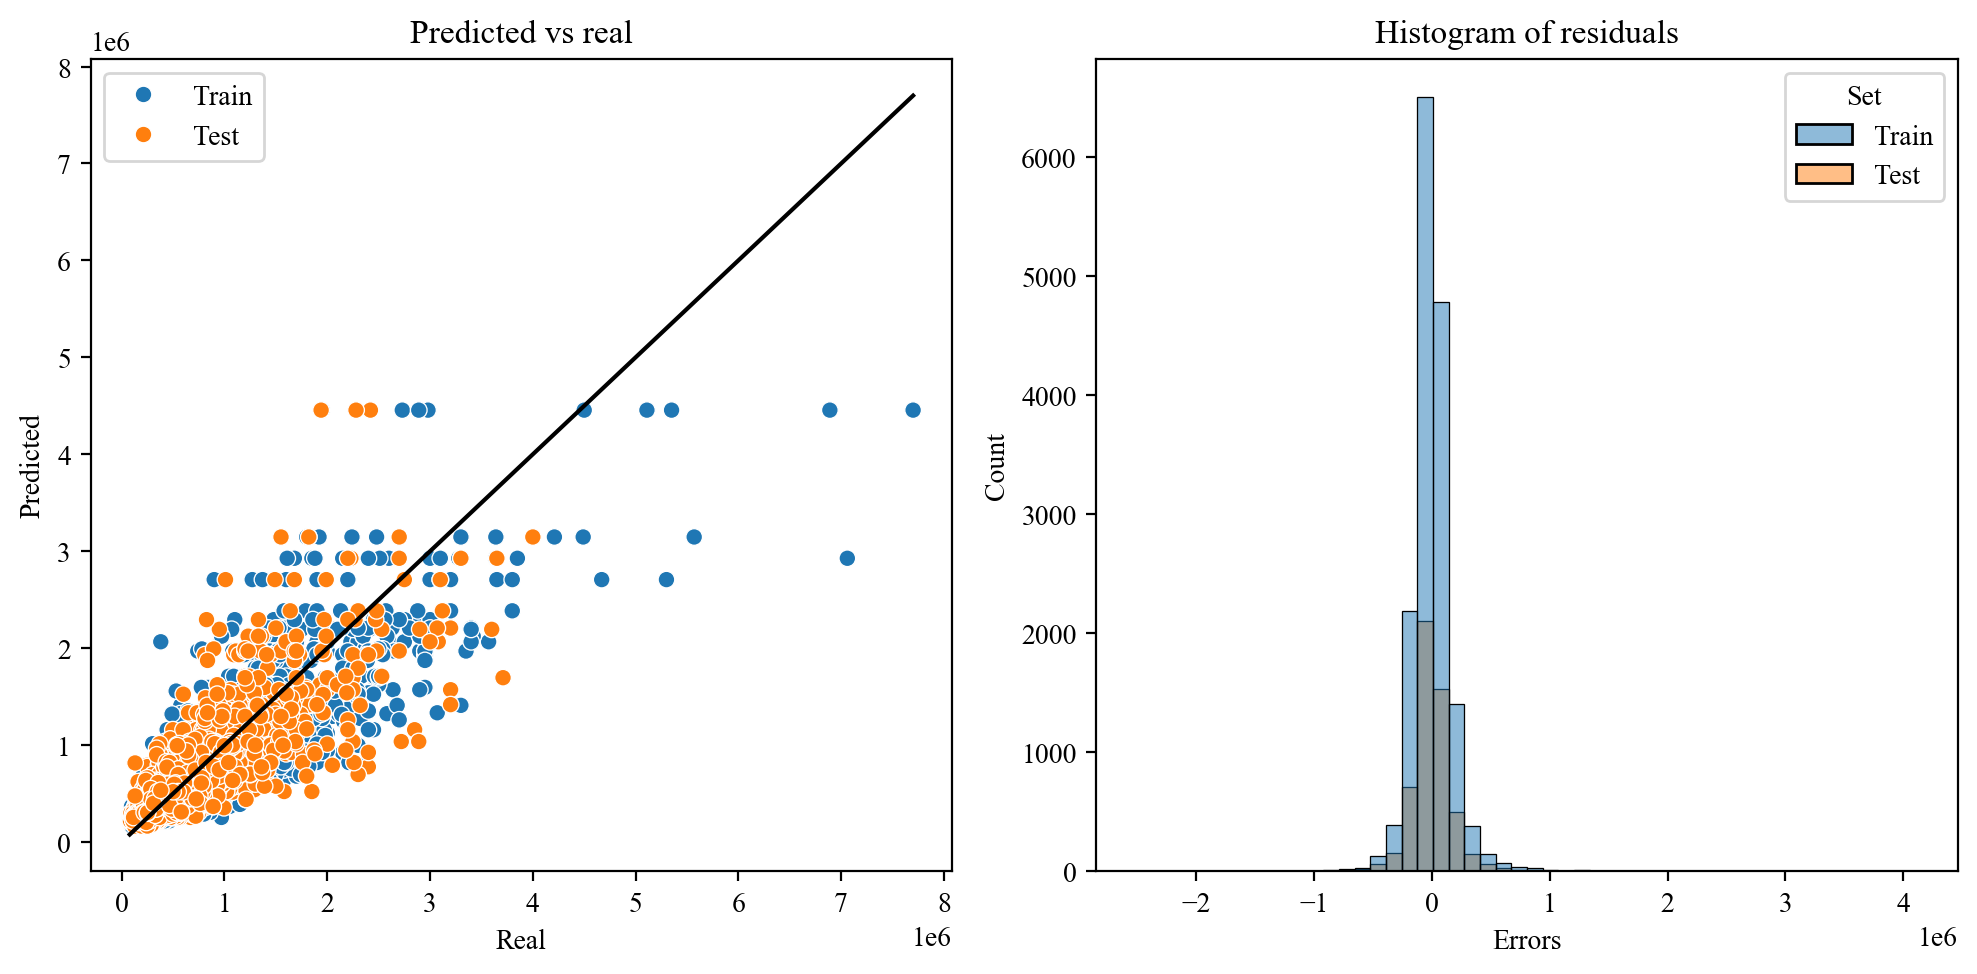

In [40]:
#visualize real and predicted
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(data=results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(data=results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [41]:
#test for mae, mse, rmse, r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
   The error metrics report function calculates for regression.

    Parameters:
    - y_real_train (list): The actual target values for the training dataset.
    - y_real_test (list): The actual target values for the testing dataset.
    - y_pred_train (list): The predicted target values for the training dataset.
    - y_pred_test (list): The predicted target values for the testing dataset.

    Returns:
    - metrics_df (DataFrame): A Pandas DataFrame containing error metrics for both the training and testing datasets.
    - 'Metric' (str): The name of the error metric.
    - 'Training Set' (float): The error metric value for the training set.
    - 'Testing Set' (float): The error metric value for the testing set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'] , 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


    return results_df

In [43]:
error_df=error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

In [44]:
display(error_df)

,Metric,Train,Test
0,MAE,118269.06,130111.70
1,MSE,34853059272.78,44119011318.47
2,RMSE,34853059272.78,44119011318.47
3,R2,0.75,0.65


In [45]:
#calculate variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_test_pred).round(2)


0.65

In [46]:
#export error metrics

#error_df.to_csv('../data/cleaned/main_error_metrics.csv', index=False)